In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rosbag
from tqdm import tqdm
import glob, os

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

width = 3.487
height = width / 1.618

def to_time(timestamp):
    return timestamp.secs + 1e-9*timestamp.nsecs

path='/media/dominic/462D-1EE8/rosbags/doughnut_calibs/husky/day1/doughnut/'
file='doughnut_filtered.bag'

# path='/home/dominic/repos/norlab_WMRD/data/husky/'
# file='test_1_2022-08-04-09-15-14.bag'

wheelbase=.57

os.chdir(path)
files = list(glob.glob("*.bag"))
husky_files = [file]

In [9]:
cols = ['t', 'vl', 'omega']

cmd_df = pd.DataFrame(columns=cols)
encoder_df = pd.DataFrame(columns=cols)

for file in tqdm(husky_files):
    bag = rosbag.Bag(file)
    cmd_df_ = pd.DataFrame(columns=cols)

    gen = bag.read_messages(topics=['/doughnut_cmd_vel'])
    msgs = list(gen)
    cmd_df_['t'] = [to_time(msg.timestamp) for msg in msgs]
    cmd_df_['vl'] = [msg.message.linear.x for msg in msgs]
    cmd_df_['omega'] = [msg.message.angular.z for msg in msgs]
    
    cmd_df = pd.concat([cmd_df, cmd_df_], ignore_index=True)
    
for file in tqdm(husky_files):
    bag = rosbag.Bag(file)
    encoder_df_ = pd.DataFrame(columns=cols)

    gen = bag.read_messages(topics=['/husky_velocity_controller/odom'])
    msgs = list(gen)
    encoder_df_['t'] = [to_time(msg.timestamp) for msg in msgs]
    encoder_df_['vl'] = [msg.message.twist.twist.linear.x for msg in msgs]
    encoder_df_['omega'] = [msg.message.twist.twist.angular.z for msg in msgs]
   
    encoder_df = pd.concat([encoder_df, encoder_df_], ignore_index=True)
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [02:40<00:00, 160.12s/it]


In [27]:
autorally_df = pd.read_csv('/home/dominic/repos/norlab_WMRD/data/autorally/autorally_velocities.csv')


In [10]:
path='/media/dominic/462D-1EE8/rosbags/friction_based_dataset/Train3/bagfiles/'

# path='/home/dominic/repos/norlab_WMRD/data/husky/'
# file='test_1_2022-08-04-09-15-14.bag'

wheelbase=.57

os.chdir(path)
jackal_files = list(glob.glob("*.bag"))

In [24]:
path='/media/dominic/462D-1EE8/rosbags/friction_based_dataset/Train1/extracted_data/odometry/'

os.chdir(path)
jackal_files_encoders = list(glob.glob("*.txt"))

cols = ['command_mode', 'omega_l', 'travel_left', 'omega_r', 'travel_right', 't']
jackal_encoder_df = pd.DataFrame(columns=cols)

for file in tqdm(jackal_files_encoders):
    encoder_df_ = pd.read_csv(file)
    jackal_encoder_df = pd.concat([jackal_encoder_df, encoder_df_], ignore_index=True)
    
print(jackal_encoder_df)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 163.44it/s]

     command_mode omega_l travel_left omega_r travel_right    t    0  \
0             NaN     NaN         NaN     NaN          NaN  NaN  0.0   
1             NaN     NaN         NaN     NaN          NaN  NaN  0.0   
2             NaN     NaN         NaN     NaN          NaN  NaN  0.0   
3             NaN     NaN         NaN     NaN          NaN  NaN  0.0   
4             NaN     NaN         NaN     NaN          NaN  NaN  0.0   
...           ...     ...         ...     ...          ...  ...  ...   
7684          NaN     NaN         NaN     NaN          NaN  NaN  0.0   
7685          NaN     NaN         NaN     NaN          NaN  NaN  0.0   
7686          NaN     NaN         NaN     NaN          NaN  NaN  0.0   
7687          NaN     NaN         NaN     NaN          NaN  NaN  0.0   
7688          NaN     NaN         NaN     NaN          NaN  NaN  0.0   

       -0.251227       13103.4   0.125613  ...   16074.1   0.0836605  \
0            0.0  13103.392578   0.125613  ...       NaN       

In [13]:
cols = ['t', 'vl', 'omega']

jackal_cmd_df = pd.DataFrame(columns=cols)


for file in tqdm(jackal_files):
    bag = rosbag.Bag(file)
    cmd_df_ = pd.DataFrame(columns=cols)

    gen = bag.read_messages(topics=['/cmd_vel'])
    msgs = list(gen)
    cmd_df_['t'] = [to_time(msg.timestamp) for msg in msgs]
    cmd_df_['vl'] = [msg.message.linear.x for msg in msgs]
    cmd_df_['omega'] = [msg.message.angular.z for msg in msgs]
    
    jackal_cmd_df = pd.concat([jackal_cmd_df, cmd_df_], ignore_index=True)
    
# for file in tqdm(husky_files):
#     bag = rosbag.Bag(file)
#     encoder_df_ = pd.DataFrame(columns=cols)

#     gen = bag.read_messages(topics=['/husky_velocity_controller/odom'])
#     msgs = list(gen)
#     encoder_df_['t'] = [to_time(msg.timestamp) for msg in msgs]
#     encoder_df_['vl'] = [msg.message.twist.twist.linear.x for msg in msgs]
#     encoder_df_['omega'] = [msg.message.twist.twist.angular.z for msg in msgs]
   
#     encoder_df = pd.concat([encoder_df, encoder_df_], ignore_index=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:05<00:00,  2.85it/s]


In [6]:
print(cmd_df)
print(encoder_df)

                       t   vl omega
0      1659706382.726443  0.0   0.0
1      1659706382.726476  0.0   0.0
2      1659706382.776646  0.0   0.0
3      1659706382.826728  0.0   0.0
4      1659706382.876568  0.0   0.0
...                  ...  ...   ...
46996  1659708734.126905  0.5   0.0
46997  1659708734.177144  0.4   0.0
46998  1659708734.226743  0.3   0.0
46999  1659708734.276696  0.2   0.0
47000  1659708734.326722  0.1   0.0

[47001 rows x 3 columns]
                       t   vl omega
0      1659706380.456545 -0.0   0.0
1      1659706380.568804 -0.0   0.0
2      1659706380.664557 -0.0   0.0
3      1659706380.776552 -0.0   0.0
4      1659706380.920202 -0.0   0.0
...                  ...  ...   ...
23633   1659708744.55935  0.0  -0.0
23634  1659708744.638517  0.0  -0.0
23635   1659708744.76741  0.0  -0.0
23636  1659708744.910703  0.0  -0.0
23637  1659708744.974494  0.0  -0.0

[23638 rows x 3 columns]


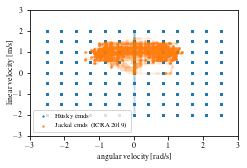

In [16]:
plt.figure(figsize=(10,10))
ax = plt.gca()
fig = plt.gcf()

# df_filtered = autorally_df[(autorally_df.linear_v < 25)] #Super weird ultra large values on linar velocity
# print("filtered {} data points".format(len(autorally_df)-len(df_filtered)))

# max_lv = max(np.abs(df_filtered['linear_v']))
# max_av = max(np.abs(df_filtered['angular_v']))


# meas = ax.scatter(df_filtered['angular_v']/(max_av/2.5), df_filtered['linear_v']/(max_lv/2.5), 
#                   c = 'tab:green', 
#                   cmap = 'hot', 
#                   alpha = 0.05, 
#                   lw=0, 
#                   s=5,
#                   label='Autorally encoders-based body velocities',
#                  rasterized=True)


cmd = ax.scatter(cmd_df['omega'], cmd_df['vl'], 
                  c = 'tab:blue', 
                  cmap = 'hot', 
                  alpha = 0.05, 
                  lw=0, 
                  s=5,
                  label='Husky cmds',
                 rasterized=True)

encoder = ax.scatter(jackal_cmd_df['omega'], jackal_cmd_df['vl'], 
                  c = 'tab:green', 
                  cmap = 'hot', 
                  alpha = 0.05, 
                  lw=0, 
                  s=5,
                  label='Jackal cmds (ICRA 2019)',
                 rasterized=True)

ax.set_ylabel('linear velocity [m/s]', labelpad=-2)
ax.set_xlabel('angular velocity [rad/s]')

leg = plt.legend(fontsize=7, loc='best')
for lh in leg.legendHandles: 
    lh.set_alpha(1)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# ax.set_xticks([-1,0,1])
# ax.set_yticks([-1,0,1])
# ax.set_xticklabels([r'$-\dot{\theta}_{max}$', '0', r'$\dot{\theta}_{max}$'])
# ax.set_yticklabels([r'$-v_{max}$', '0', r'$v_{max}$'])

fig.subplots_adjust(left=.15, bottom=.17, right=.98, top=.98)
fig.set_size_inches(width, height)

plt.savefig('/home/dominic/repos/norlab_WMRD/DB/figs/husky_velocities.jpg', dpi=500)

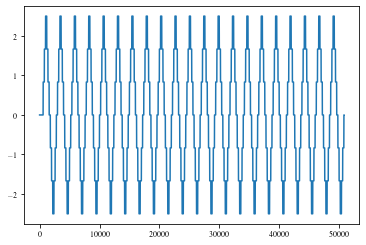

In [19]:
plt.plot(cmd_df['omega'])

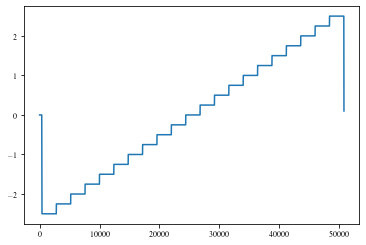

In [20]:
plt.plot(cmd_df['vl'])

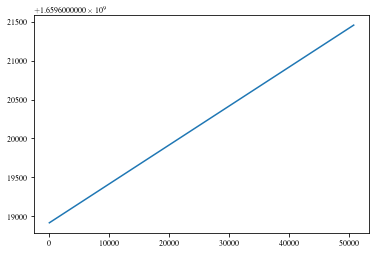

In [21]:
plt.plot(cmd_df['t'])

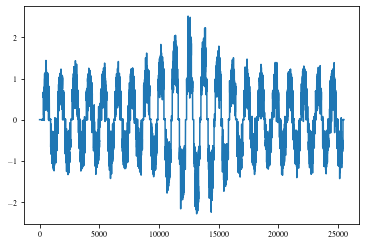

In [22]:
plt.plot(encoder_df['omega'])

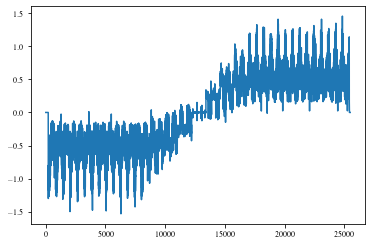

In [23]:
plt.plot(encoder_df['vl'])